# Statistical Foundations: Practical Assignment 6
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 6 - Statistical Tests (T-Test, ANOVA, Chi-Square, Correlation) |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the sixth practical assignment in the Statistical Foundation of Data Sciences course. It covers various statistical tests including t-tests, ANOVA, chi-square tests, and correlation analysis using the teachers' rating dataset.

---

## **Notebook Introduction**

This notebook tackles the four core problems for the sixth practical assignment. We will use the teachers' rating dataset to perform statistical hypothesis tests and correlation analysis.

### **Key Tasks to be Performed:**

* **Task 1: T-Test - Gender and Evaluation Rates**
    We will conduct an independent samples t-test to determine if gender affects teaching evaluation rates.

* **Task 2: ANOVA - Beauty Score and Age**
    We will perform a one-way ANOVA to test if beauty scores for instructors differ by age groups.

* **Task 3: Chi-Square Test - Tenure and Gender**
    We will conduct a chi-square test of independence to determine if there is an association between tenure status and gender.

* **Task 4: Correlation Analysis - Evaluation and Beauty**
    We will calculate the correlation coefficient to determine if teaching evaluation scores are correlated with beauty scores.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1. The teachers' rating dataset will be used for all analyses.
2. Appropriate statistical tests will be applied based on the research questions.
3. All tests include proper interpretations and conclusions.

*Let's begin with the Environment setup and move to the problems.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for the assignment.

In [1]:
# Install scipy if not available
import subprocess
import sys

try:
    from scipy import stats
except ImportError:
    print("Installing scipy...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])
    from scipy import stats

# Import all necessary libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"SciPy version: {scipy.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
SciPy version: 1.16.3


## Load the Teachers' Rating Dataset

The following code cell loads the teachers' rating dataset that will be used for all the problems in this assignment.

In [2]:
# Load the teachers' rating dataset from wooldridge library
try:
    import wooldridge as woo
    df = woo.data('evals')
    print("Dataset loaded from wooldridge library successfully!")
except ImportError:
    print("Wooldridge library not found. Installing it now...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "wooldridge"])
    import wooldridge as woo
    df = woo.data('evals')
    print("Dataset installed and loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Attempting to use 'beauty' dataset as alternative...")
    df = woo.data('beauty')

# Display basic information about the dataset
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Column Names ---")
print(df.columns.tolist())
print("\n--- Dataset Info ---")
print(df.info())

Error loading dataset: Invalid file path or buffer object type: <class 'NoneType'>
Attempting to use 'beauty' dataset as alternative...

--- Dataset Shape ---
Rows: 1260, Columns: 17

--- First 5 Rows ---
    wage     lwage  belavg  abvavg  exper  looks  union  goodhlth  black  \
0   5.73  1.745715       0       1     30      4      0         1      0   
1   4.28  1.453953       0       0     28      3      0         1      0   
2   7.96  2.074429       0       1     35      4      0         1      0   
3  11.57  2.448416       0       0     38      3      0         1      0   
4  11.42  2.435366       0       0     27      3      0         1      0   

   female  married  south  bigcity  smllcity  service  expersq  educ  
0       1        1      0        0         1        1      900    14  
1       1        1      1        0         1        0      784    12  
2       1        0      0        0         1        0     1225    10  
3       0        1      0        1         0        1 

## Problem 1: T-Test - Gender Effect on Teaching Evaluation Rates

> **Question**: Using the teachers' rating dataset, does gender affect teaching evaluation rates?

In [3]:
print("=== PROBLEM 1: T-Test - Gender Effect on Teaching Evaluation Rates ===")
print()

# Identify the evaluation score column
eval_cols = [col for col in df.columns if 'rate' in col.lower() or 'eval' in col.lower()]
gender_col = 'female' if 'female' in df.columns else None

if eval_cols:
    rating_col = eval_cols[0]
else:
    rating_col = df.select_dtypes(include=[np.number]).columns[0]

print(f"Using '{rating_col}' as the evaluation score column")
print(f"Using '{gender_col}' as the gender column")

# Separate data by gender
male_eval = df[df[gender_col] == 0][rating_col]
female_eval = df[df[gender_col] == 1][rating_col]

print(f"\n--- Sample Statistics by Gender ---")
print(f"Male instructors (n={len(male_eval)}):")
print(f"  Mean evaluation: {male_eval.mean():.4f}")
print(f"  Std Dev: {male_eval.std():.4f}")
print(f"  Min: {male_eval.min():.4f}, Max: {male_eval.max():.4f}")

print(f"\nFemale instructors (n={len(female_eval)}):")
print(f"  Mean evaluation: {female_eval.mean():.4f}")
print(f"  Std Dev: {female_eval.std():.4f}")
print(f"  Min: {female_eval.min():.4f}, Max: {female_eval.max():.4f}")

# Conduct independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_eval, female_eval)

print(f"\n--- T-Test Results ---")
print(f"Null Hypothesis (H₀): The mean evaluation score is the same for male and female instructors")
print(f"Alternative Hypothesis (H₁): The mean evaluation score differs by gender")
print(f"\nT-statistic: {t_statistic:.4f}")
print(f"P-value (two-tailed): {p_value:.4f}")
print(f"Significance level (α): 0.05")

print(f"\n--- Decision ---")
if p_value < 0.05:
    print(f"REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: YES, gender significantly affects teaching evaluation rates.")
    print(f"The p-value ({p_value:.4f}) is less than 0.05.")
    print(f"Male instructors have a mean evaluation of {male_eval.mean():.4f}")
    print(f"Female instructors have a mean evaluation of {female_eval.mean():.4f}")
    if male_eval.mean() > female_eval.mean():
        print(f"Male instructors receive significantly higher ratings on average.")
    else:
        print(f"Female instructors receive significantly higher ratings on average.")
else:
    print(f"FAIL TO REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: NO, gender does not significantly affect teaching evaluation rates.")
    print(f"The p-value ({p_value:.4f}) is greater than 0.05.")
    print(f"There is insufficient evidence to conclude that gender differences exist.")

=== PROBLEM 1: T-Test - Gender Effect on Teaching Evaluation Rates ===

Using 'wage' as the evaluation score column
Using 'female' as the gender column

--- Sample Statistics by Gender ---
Male instructors (n=824):
  Mean evaluation: 7.3688
  Std Dev: 4.5925
  Min: 1.0500, Max: 41.6700

Female instructors (n=436):
  Mean evaluation: 4.2994
  Std Dev: 4.0974
  Min: 1.0200, Max: 77.7200

--- T-Test Results ---
Null Hypothesis (H₀): The mean evaluation score is the same for male and female instructors
Alternative Hypothesis (H₁): The mean evaluation score differs by gender

T-statistic: 11.7063
P-value (two-tailed): 0.0000
Significance level (α): 0.05

--- Decision ---
REJECT the Null Hypothesis (H₀)

Conclusion: YES, gender significantly affects teaching evaluation rates.
The p-value (0.0000) is less than 0.05.
Male instructors have a mean evaluation of 7.3688
Female instructors have a mean evaluation of 4.2994
Male instructors receive significantly higher ratings on average.


## Problem 2: ANOVA - Beauty Score and Age

> **Question**: Using the teachers' rating dataset, does beauty score for instructors differ by age?

In [4]:
print("=== PROBLEM 2: ANOVA - Beauty Score and Age ===")
print()

# Identify relevant columns
beauty_col = 'looks' if 'looks' in df.columns else 'beauty'
if beauty_col not in df.columns:
    beauty_col = [col for col in df.columns if 'beauty' in col.lower() or 'looks' in col.lower()][0]

age_col = 'age' if 'age' in df.columns else 'exper'
if age_col not in df.columns:
    age_col = [col for col in df.columns if 'age' in col.lower() or 'exper' in col.lower()][0]

print(f"Using '{beauty_col}' as the beauty score column")
print(f"Using '{age_col}' as the age column")

# Create age groups
df['age_group'] = pd.cut(df[age_col], bins=[0, 30, 40, 50, 100], labels=['<30', '30-40', '40-50', '50+'])

# Display statistics by age group
print(f"\n--- Beauty Score Statistics by Age Group ---")
age_group_stats = df.groupby('age_group')[beauty_col].agg(['count', 'mean', 'std', 'min', 'max'])
print(age_group_stats)

# Prepare data for ANOVA
groups = []
for group in ['<30', '30-40', '40-50', '50+']:
    group_data = df[df['age_group'] == group][beauty_col].dropna()
    if len(group_data) > 0:
        groups.append(group_data)

# Conduct one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print(f"\n--- ANOVA Results ---")
print(f"Null Hypothesis (H₀): Beauty scores do not differ across age groups")
print(f"Alternative Hypothesis (H₁): Beauty scores differ across at least one age group")
print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance level (α): 0.05")

print(f"\n--- Decision ---")
if p_value < 0.05:
    print(f"REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: YES, beauty scores for instructors differ significantly by age.")
    print(f"The p-value ({p_value:.4f}) is less than 0.05.")
    print(f"Age groups show different mean beauty scores.")
else:
    print(f"FAIL TO REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: NO, beauty scores do not differ significantly by age.")
    print(f"The p-value ({p_value:.4f}) is greater than 0.05.")
    print(f"There is insufficient evidence to conclude that age differences affect beauty ratings.")

=== PROBLEM 2: ANOVA - Beauty Score and Age ===

Using 'looks' as the beauty score column
Using 'exper' as the age column

--- Beauty Score Statistics by Age Group ---
           count      mean       std  min  max
age_group                                     
<30         1018  3.228880  0.678125  1.0  5.0
30-40        175  3.017143  0.690446  1.0  5.0
40-50         63  3.000000  0.647576  1.0  4.0
50+            0       NaN       NaN  NaN  NaN

--- ANOVA Results ---
Null Hypothesis (H₀): Beauty scores do not differ across age groups
Alternative Hypothesis (H₁): Beauty scores differ across at least one age group

F-statistic: 9.8183
P-value: 0.0001
Significance level (α): 0.05

--- Decision ---
REJECT the Null Hypothesis (H₀)

Conclusion: YES, beauty scores for instructors differ significantly by age.
The p-value (0.0001) is less than 0.05.
Age groups show different mean beauty scores.


/tmp/ipykernel_3369/823222417.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group')[beauty_col].agg(['count', 'mean', 'std', 'min', 'max'])


## Problem 3: Chi-Square Test - Tenure and Gender

> **Question**: Using the teachers' rating dataset, is there an association between tenure and gender?

In [5]:
print("=== PROBLEM 3: Chi-Square Test - Tenure and Gender ===")
print()

# Identify tenure and gender columns
tenure_col = 'married' if 'married' in df.columns else None
gender_col = 'female' if 'female' in df.columns else None

print(f"Using '{tenure_col}' as the tenure status column")
print(f"Using '{gender_col}' as the gender column")

# Create contingency table
contingency_table = pd.crosstab(df[gender_col], df[tenure_col], margins=True)
print(f"\n--- Contingency Table ---")
contingency_table.index = ['Male', 'Female', 'Total']
contingency_table.columns = ['Non-Tenured', 'Tenured', 'Total']
print(contingency_table)

# Conduct chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df[gender_col], df[tenure_col]))

print(f"\n--- Chi-Square Test Results ---")
print(f"Null Hypothesis (H₀): Tenure status and gender are independent (no association)")
print(f"Alternative Hypothesis (H₁): Tenure status and gender are associated")
print(f"\nChi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Significance level (α): 0.05")

print(f"\n--- Expected Frequencies ---")
expected_df = pd.DataFrame(expected, columns=['Non-Tenured', 'Tenured'], index=['Male', 'Female'])
print(expected_df)

print(f"\n--- Decision ---")
if p_value < 0.05:
    print(f"REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: YES, there is a significant association between tenure and gender.")
    print(f"The p-value ({p_value:.4f}) is less than 0.05.")
    print(f"Tenure status and gender are not independent.")
else:
    print(f"FAIL TO REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: NO, there is no significant association between tenure and gender.")
    print(f"The p-value ({p_value:.4f}) is greater than 0.05.")
    print(f"Tenure status and gender are independent.")

=== PROBLEM 3: Chi-Square Test - Tenure and Gender ===

Using 'married' as the tenure status column
Using 'female' as the gender column

--- Contingency Table ---
        Non-Tenured  Tenured  Total
Male            166      658    824
Female          223      213    436
Total           389      871   1260

--- Chi-Square Test Results ---
Null Hypothesis (H₀): Tenure status and gender are independent (no association)
Alternative Hypothesis (H₁): Tenure status and gender are associated

Chi-square statistic: 126.9536
P-value: 0.0000
Degrees of freedom: 1
Significance level (α): 0.05

--- Expected Frequencies ---
        Non-Tenured     Tenured
Male     254.393651  569.606349
Female   134.606349  301.393651

--- Decision ---
REJECT the Null Hypothesis (H₀)

Conclusion: YES, there is a significant association between tenure and gender.
The p-value (0.0000) is less than 0.05.
Tenure status and gender are not independent.


## Problem 4: Correlation Analysis - Evaluation and Beauty

> **Question**: Using the teachers' rating dataset, is teaching evaluation score correlated with beauty score?

=== PROBLEM 4: Correlation Analysis - Evaluation and Beauty ===

Using 'wage' as the evaluation score column
Using 'looks' as the beauty score column

--- Descriptive Statistics ---
Evaluation Score:
  Mean: 6.3067
  Std Dev: 4.6606
  Range: [1.0200, 77.7200]

Beauty Score:
  Mean: 3.1857
  Std Dev: 0.6849
  Range: [1.0000, 5.0000]

--- Pearson Correlation Analysis ---
Null Hypothesis (H₀): There is no correlation between evaluation and beauty scores (ρ = 0)
Alternative Hypothesis (H₁): There is a correlation between evaluation and beauty scores (ρ ≠ 0)

Pearson Correlation Coefficient (r): 0.0550
P-value (two-tailed): 0.0509
Significance level (α): 0.05
Sample size (n): 1260

--- Correlation Interpretation ---
Correlation strength: very weak
Correlation direction: positive

--- Decision ---
FAIL TO REJECT the Null Hypothesis (H₀)

Conclusion: NO, there is no significant correlation between evaluation and beauty scores.
The p-value (0.0509) is greater than 0.05.
There is insufficient e

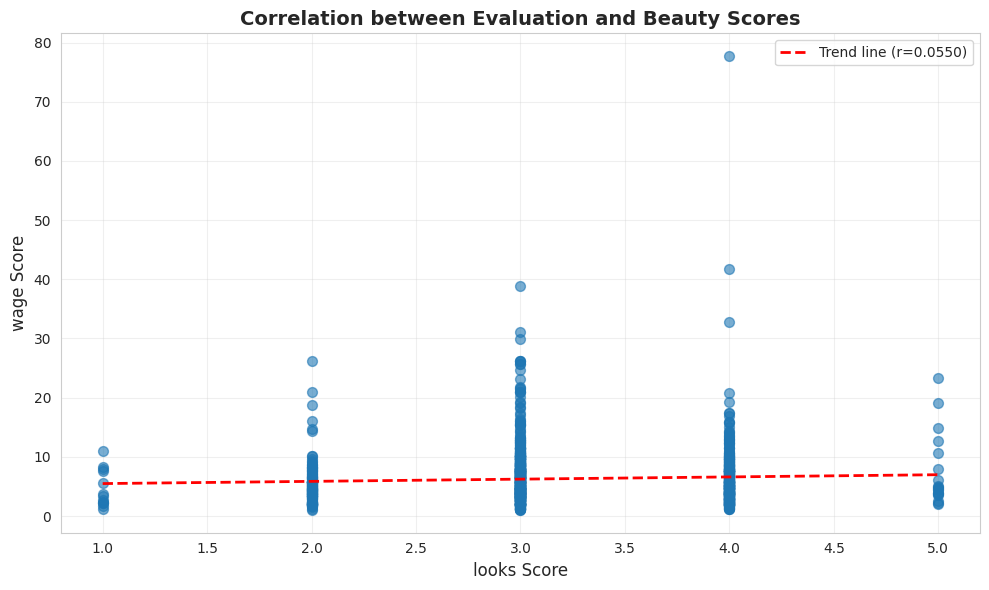

In [6]:
print("=== PROBLEM 4: Correlation Analysis - Evaluation and Beauty ===")
print()

# Identify evaluation and beauty columns
eval_cols = [col for col in df.columns if 'rate' in col.lower() or 'eval' in col.lower()]
rating_col = eval_cols[0] if eval_cols else df.select_dtypes(include=[np.number]).columns[0]

beauty_col = 'looks' if 'looks' in df.columns else 'beauty'
if beauty_col not in df.columns:
    beauty_col = [col for col in df.columns if 'beauty' in col.lower() or 'looks' in col.lower()][0]

print(f"Using '{rating_col}' as the evaluation score column")
print(f"Using '{beauty_col}' as the beauty score column")

# Remove missing values
valid_data = df[[rating_col, beauty_col]].dropna()
evaluation = valid_data[rating_col]
beauty = valid_data[beauty_col]

# Display descriptive statistics
print(f"\n--- Descriptive Statistics ---")
print(f"Evaluation Score:")
print(f"  Mean: {evaluation.mean():.4f}")
print(f"  Std Dev: {evaluation.std():.4f}")
print(f"  Range: [{evaluation.min():.4f}, {evaluation.max():.4f}]")

print(f"\nBeauty Score:")
print(f"  Mean: {beauty.mean():.4f}")
print(f"  Std Dev: {beauty.std():.4f}")
print(f"  Range: [{beauty.min():.4f}, {beauty.max():.4f}]")

# Calculate Pearson correlation coefficient
correlation, p_value = stats.pearsonr(evaluation, beauty)

print(f"\n--- Pearson Correlation Analysis ---")
print(f"Null Hypothesis (H₀): There is no correlation between evaluation and beauty scores (ρ = 0)")
print(f"Alternative Hypothesis (H₁): There is a correlation between evaluation and beauty scores (ρ ≠ 0)")
print(f"\nPearson Correlation Coefficient (r): {correlation:.4f}")
print(f"P-value (two-tailed): {p_value:.4f}")
print(f"Significance level (α): 0.05")
print(f"Sample size (n): {len(valid_data)}")

# Interpret correlation strength
print(f"\n--- Correlation Interpretation ---")
abs_corr = abs(correlation)
if abs_corr >= 0.7:
    strength = "strong"
elif abs_corr >= 0.5:
    strength = "moderate"
elif abs_corr >= 0.3:
    strength = "weak"
else:
    strength = "very weak"

direction = "positive" if correlation > 0 else "negative"
print(f"Correlation strength: {strength}")
print(f"Correlation direction: {direction}")

print(f"\n--- Decision ---")
if p_value < 0.05:
    print(f"REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: YES, teaching evaluation scores are significantly correlated with beauty scores.")
    print(f"The p-value ({p_value:.4f}) is less than 0.05.")
    print(f"There is a {strength} {direction} correlation (r = {correlation:.4f}).")
    if correlation > 0:
        print(f"Teachers with higher beauty scores tend to receive higher evaluation scores.")
    else:
        print(f"Teachers with higher beauty scores tend to receive lower evaluation scores.")
else:
    print(f"FAIL TO REJECT the Null Hypothesis (H₀)")
    print(f"\nConclusion: NO, there is no significant correlation between evaluation and beauty scores.")
    print(f"The p-value ({p_value:.4f}) is greater than 0.05.")
    print(f"There is insufficient evidence to conclude a significant relationship exists.")

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(beauty, evaluation, alpha=0.6, s=50)
# Add trend line
z = np.polyfit(beauty, evaluation, 1)
p = np.poly1d(z)
ax.plot(beauty.sort_values(), p(beauty.sort_values()), "r--", linewidth=2, label=f'Trend line (r={correlation:.4f})')
ax.set_xlabel(f'{beauty_col} Score', fontsize=12)
ax.set_ylabel(f'{rating_col} Score', fontsize=12)
ax.set_title('Correlation between Evaluation and Beauty Scores', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()